In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [2]:
app_df = pd.read_csv('Resources/googleplaystore.csv')
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
categorical = [var for var in app_df.columns if app_df[var].dtype=='O']
print(categorical)

['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [5]:
#print for values
rating = app_df["Rating"].unique()
reviews = app_df["Reviews"].unique()
size = app_df["Size"].unique()
installs = app_df["Installs"].unique()
type_ = app_df["Type"].unique()
price = app_df["Price"].unique()
content_rating = app_df["Content Rating"].unique()

In [6]:
#null check
app_df.isnull().any()
app_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#clean check
app_df_clean = app_df.dropna(how='any')
app_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


<h4>App Categories

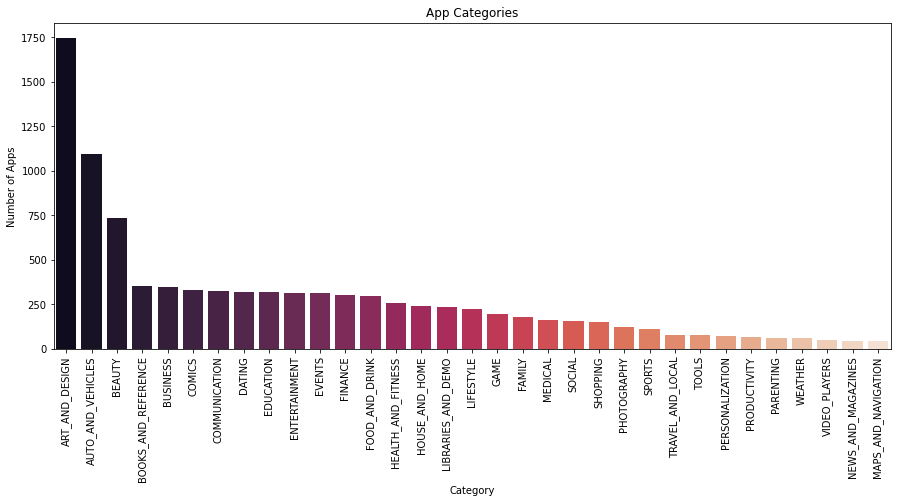

In [8]:
#cat var
cat =app_df_clean["Category"].unique()
cat_count= app_df_clean["Category"].value_counts()
cat_count_list = cat_count.tolist() #y
#cat_list = cat.tolist()

x = cat
y = cat_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

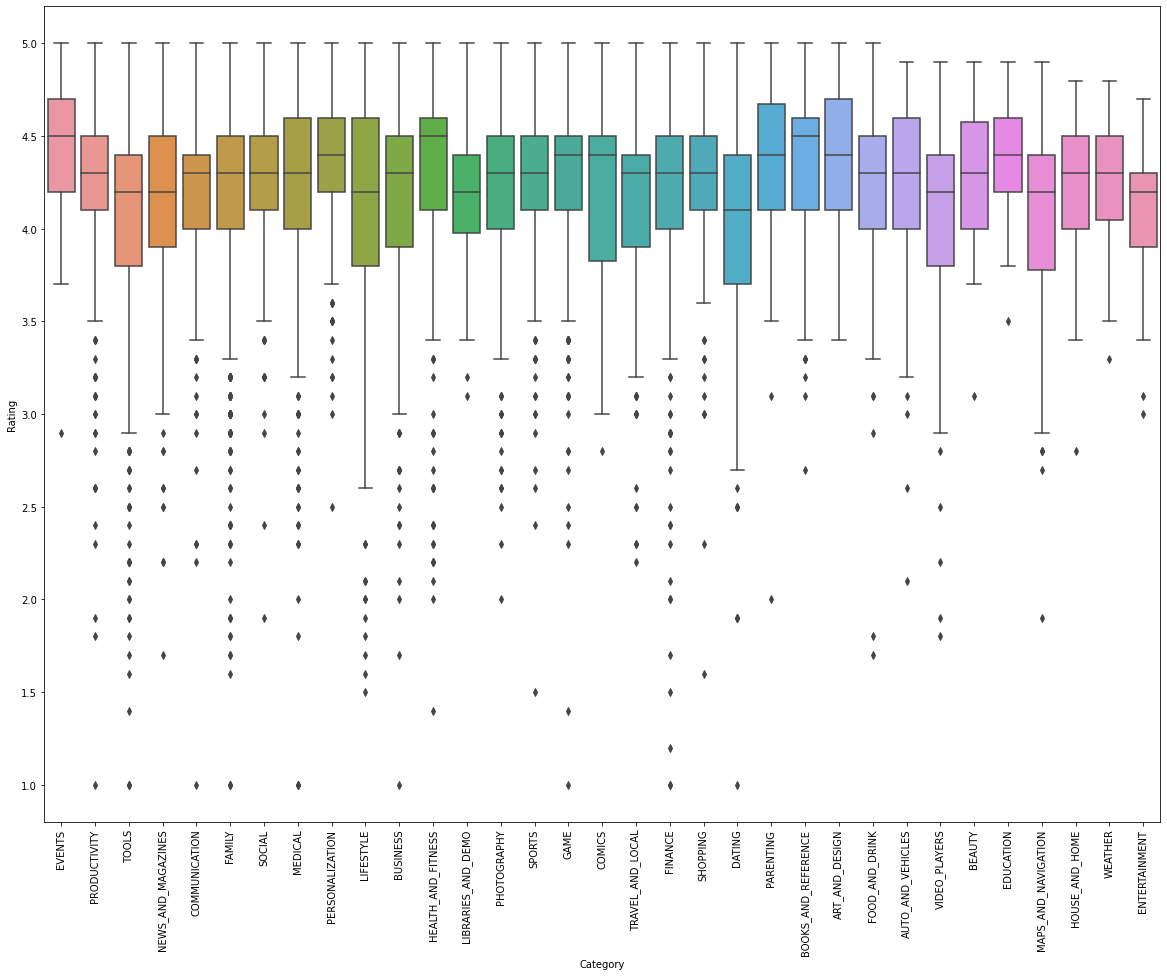

                      App
Category                 
ART_AND_DESIGN         61
AUTO_AND_VEHICLES      73
BEAUTY                 42
BOOKS_AND_REFERENCE   178
BUSINESS              303
COMICS                 58
COMMUNICATION         328
DATING                195
EDUCATION             155
ENTERTAINMENT         149
EVENTS                 45
FAMILY               1746
FINANCE               323
FOOD_AND_DRINK        109
GAME                 1097
HEALTH_AND_FITNESS    297
HOUSE_AND_HOME         76
LIBRARIES_AND_DEMO     64
LIFESTYLE             314
MAPS_AND_NAVIGATION   124
MEDICAL               350
NEWS_AND_MAGAZINES    233
PARENTING              50
PERSONALIZATION       312
PHOTOGRAPHY           317
PRODUCTIVITY          351
SHOPPING              238
SOCIAL                259
SPORTS                319
TOOLS                 733
TRAVEL_AND_LOCAL      226
VIDEO_PLAYERS         160
WEATHER                75


In [9]:
count_cat = app_df_clean.groupby(['Category']).count()
cat_df = pd.DataFrame(count_cat.App)
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = app_df_clean.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)
plt.show()
print(cat_df)

<h4>App Genres

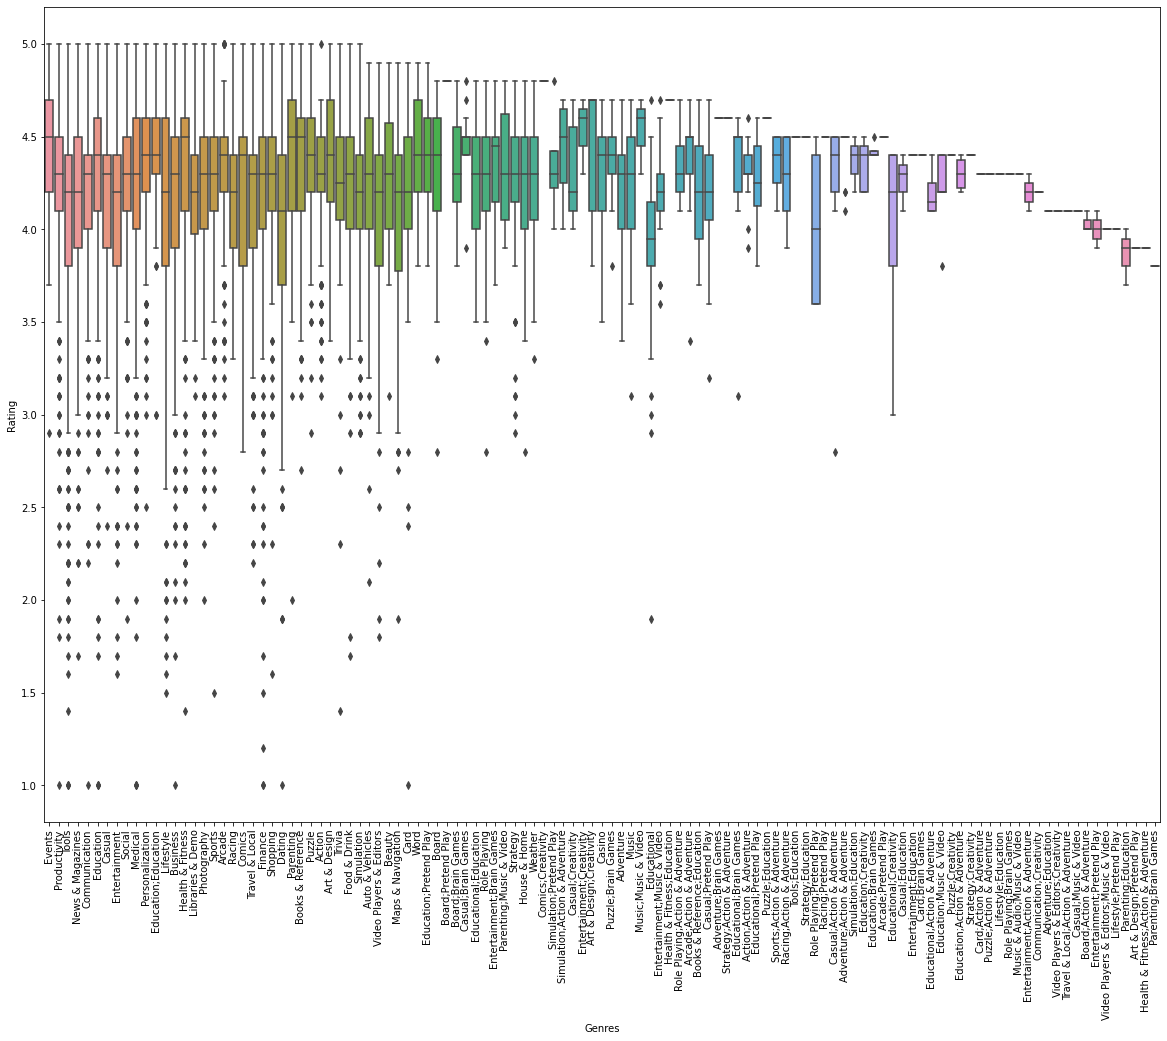

In [10]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
count_gen = app_df_clean.groupby(['Genres']).count()
gen_df = pd.DataFrame(count_gen.App)

plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Genres',data = app_df_clean.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)
plt.show()

<h4>App Ratings

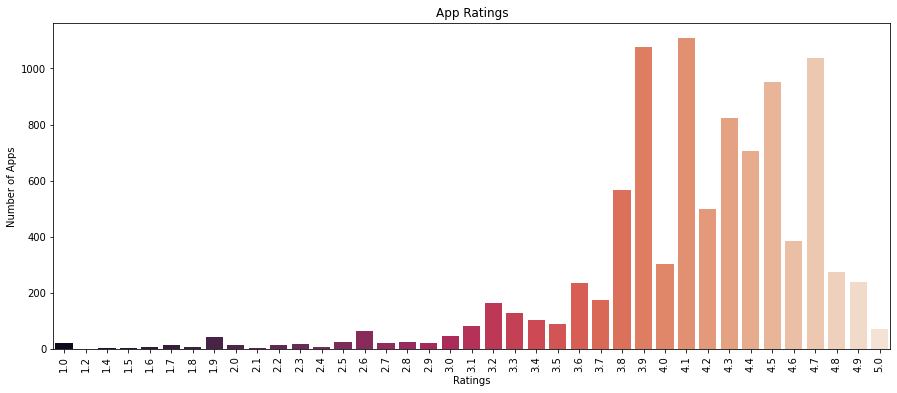

In [11]:
rating = app_df_clean["Rating"].unique()
rating_count= app_df_clean["Rating"].value_counts()
rating_count_list = rating_count.tolist() #y

x = rating
y = rating_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Apps")
plt.show()

Rating Histogram, Distribution

Text(0.5, 1.0, 'Rating Distribution')

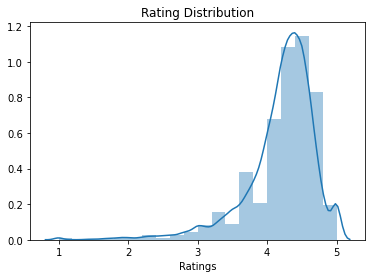

In [12]:
fig = sns.distplot(app_df_clean["Rating"], bins=20)   

fig.set_xlabel('Ratings')
plt.title('Rating Distribution')

In [13]:
min_value = app_df_clean['Rating'].min()
max_value = app_df_clean['Rating'].max()
rating_bins = np.linspace(min_value,max_value,20)
print(rating_bins)

[1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
 2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
 3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
 4.78947368 5.        ]


<h4>App Reviews 

In [14]:
app_df_clean = app_df_clean.astype({'Reviews':int})

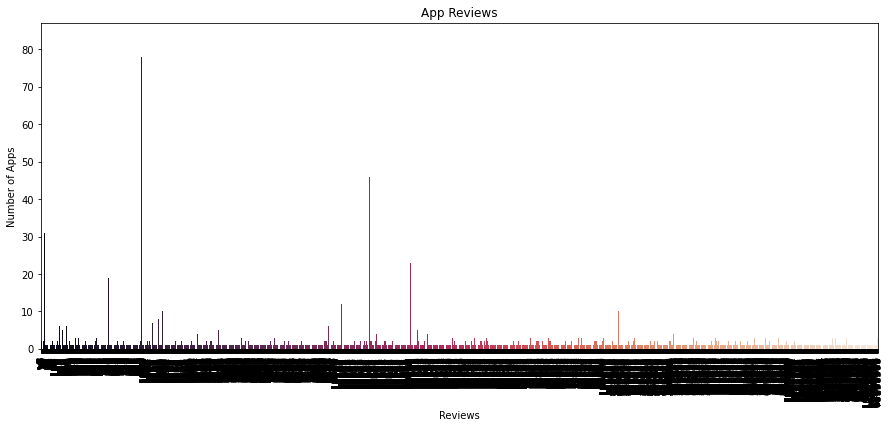

In [15]:
reviews =app_df_clean["Reviews"].unique()
review_count= app_df_clean["Reviews"].value_counts()
review_count_list = review_count.tolist() #y

x = reviews
y = review_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Reviews")
plt.xlabel("Reviews")
plt.ylabel("Number of Apps")
plt.show()

Text(0.5, 1.0, 'Reviews Distribution')

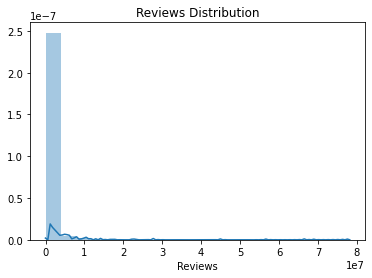

In [16]:
fig = sns.distplot(app_df_clean["Reviews"], bins=20)   

fig.set_xlabel('Reviews')
plt.title('Reviews Distribution')

In [17]:
min_value = app_df_clean["Reviews"].min()
max_value = app_df_clean["Reviews"].max()
rating_bins = np.linspace(min_value,max_value,20)
rating_bins.astype(int)

array([       1,  4113596,  8227191, 12340786, 16454381, 20567976,
       24681571, 28795166, 32908761, 37022356, 41135951, 45249546,
       49363141, 53476736, 57590331, 61703926, 65817521, 69931116,
       74044711, 78158306])

<h4>App Installs

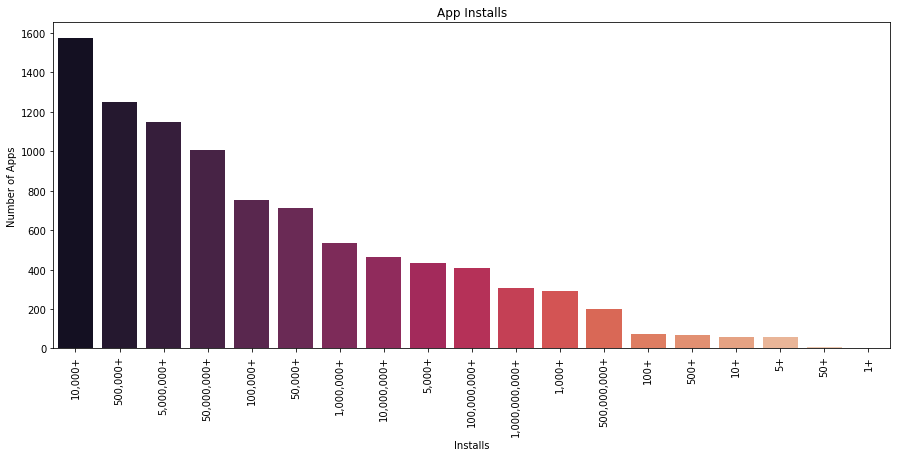

In [18]:
installs =app_df_clean["Installs"].unique()
installs_count= app_df_clean["Installs"].value_counts()
installs_count_list = installs_count.tolist() #y


x = installs
y = installs_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Installs")
plt.xlabel("Installs")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Types

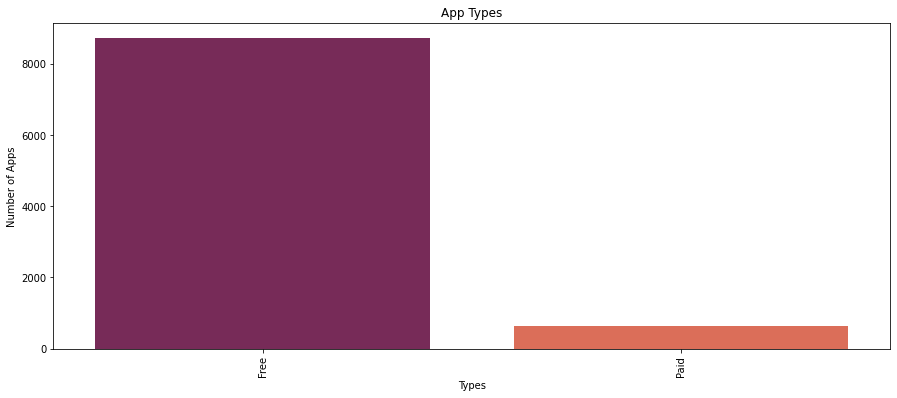

In [19]:
#cat var
type_ =app_df_clean["Type"].unique()
type_count= app_df_clean["Type"].value_counts()
type_count_list = type_count.tolist() #y
#cat_list = cat.tolist()

x = type_
y = type_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Types")
plt.xlabel("Types")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Price

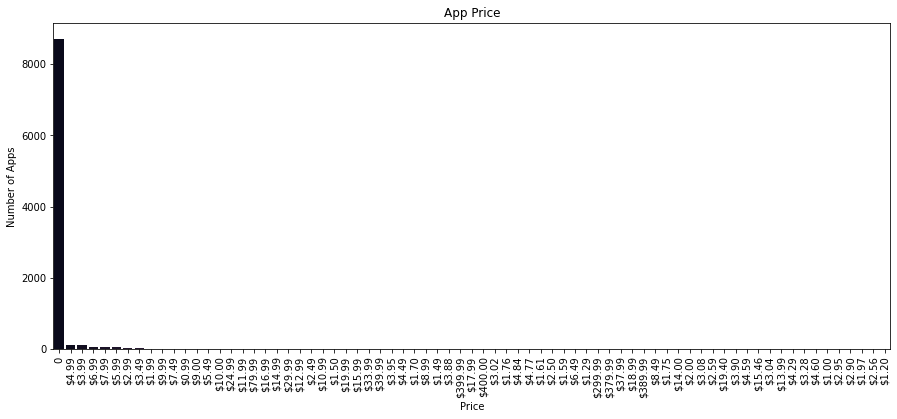

In [20]:
#cat var
price =app_df_clean["Price"].unique()
price_count= app_df_clean["Price"].value_counts()
price_count_list = price_count.tolist() #y
#cat_list = cat.tolist()

x = price
y = price_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Price")
plt.xlabel("Price")
plt.ylabel("Number of Apps")
plt.show()

<h4>App Content Ratings

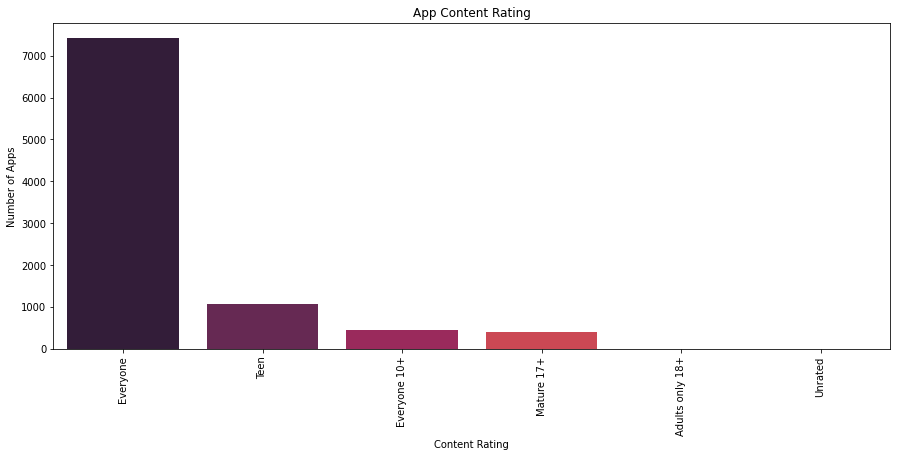

In [21]:
cr =app_df_clean["Content Rating"].unique()
cr_count= app_df_clean["Content Rating"].value_counts()
cr_count_list = cr_count.tolist() #y

x = cr
y = cr_count_list
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.xticks(rotation='vertical')
plt.title("App Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()

In [22]:
app_df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
app_df_new  = app_df_clean[['Category','Rating','Reviews','Size','Installs','Type','Content Rating']]
app_df_new.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone


<b>Re-setting Columns for Value Evaluation

In [24]:
reviews = app_df_new["Reviews"].unique()
print(reviews)

[   159    967  87510 ...    603   1195 398307]


In [25]:
app_df_new = app_df_new.astype({'Reviews':int})

In [26]:
size = app_df_new["Size"].unique()

In [27]:
app_df_new = app_df_new[app_df_new.Size != 'Varies with device']
app_df_new['Size'] =app_df_new['Size'].replace({'k': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
#optional size conversion 
#app_df_new['Size'] =app_df_new['Size'].replace({'k': '*.001', 'M': '*1'}, regex=True).map(pd.eval).astype(float)

In [28]:
installs = app_df["Installs"].unique()
print(installs)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [29]:
app_df_new['Installs'] = app_df_new['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
app_df_new['Installs'] = app_df_new.Installs.astype(int)

In [30]:
type_ = app_df_new["Type"].unique()
print(type_)

content_rating = app_df_new["Content Rating"].unique()
print(content_rating)

['Free' 'Paid']
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [31]:
#app_df_new = app_df_new[app_df_new.Price != 'Everyone'] 
#app_df_new['Price'] = app_df_new['Price'].apply(lambda x : x.strip('$'))
#app_df_new['Price'] = app_df_new.Price.astype(float)

<h4>One-Hot Encoded Category, Type, Content Rating DataFrame

In [32]:
categorical = [var for var in app_df_new.columns if app_df_new[var].dtype=='O']
print(categorical)

['Category', 'Type', 'Content Rating']


In [33]:
numeric_subset = app_df_new.select_dtypes('number')
categorical_subset = app_df_new.select_dtypes('object')

# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns])

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

In [34]:
features_reset =features.reset_index().drop('index', axis=1)

In [35]:
features_reset

,Rating,Reviews,Size,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000000,10000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,4.8,44,619000,1000,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
7719,4.0,7,2600000,500,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7720,4.5,38,53000000,5000,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7721,5.0,4,3600000,100,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


<h4>Categorical Correlation to Rating with One-Hot Encoded DataFrame</h4>
Correlation to Rating in Combination with Size, Reviews, Installs, Type 

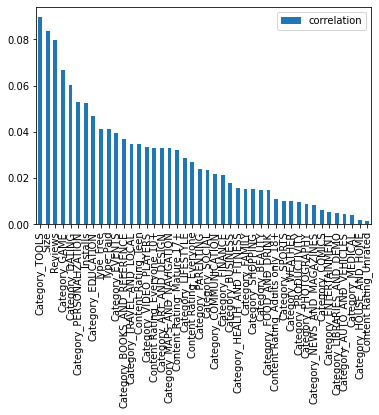

,correlation
Category_TOOLS,0.089536
Size,0.083640
Reviews,0.079819
Category_GAME,0.066667
Category_DATING,0.060074
Category_PERSONALIZATION,0.053027
Installs,0.052693
Category_EDUCATION,0.047088
Type_Free,0.041180
Type_Paid,0.041180


In [36]:
features_correlation = pd.DataFrame({'correlation' : features_reset.corr()["Rating"].abs().sort_values(ascending=False)[1:]})

features_correlation.plot(kind="bar")
plt.show()

features_correlation.head(20)

<h4>Type Correlation to Rating with One-Hot Encoded DataFrame</h4>
To determine categorical tier value weight importance.

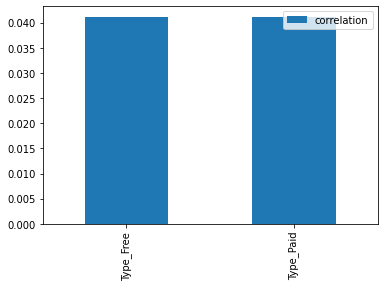

,correlation
Type_Free,0.04118
Type_Paid,0.04118


In [37]:
type_correlation = features_reset[["Rating","Type_Free", "Type_Paid"]]
correlation = pd.DataFrame({'correlation' : type_correlation.corr()["Rating"].abs().sort_values(ascending=False)[1:]})

correlation.plot(kind="bar")
plt.show()

correlation.head(10)

<h4>Content Rating Correlation to Rating with One-Hot Encoded DataFrame</h4>
To determine categorical tier value weight importance.

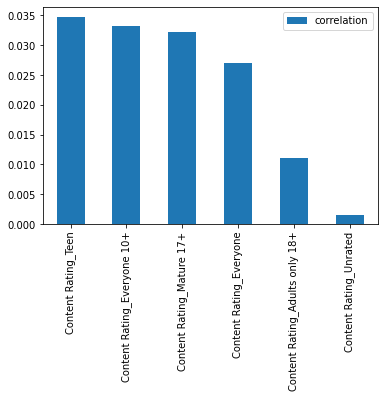

,correlation
Content Rating_Teen,0.034721
Content Rating_Everyone 10+,0.033132
Content Rating_Mature 17+,0.032264
Content Rating_Everyone,0.027013
Content Rating_Adults only 18+,0.011114
Content Rating_Unrated,0.001545


In [38]:
content_rating_correlation = features_reset[['Rating','Content Rating_Adults only 18+', 'Content Rating_Everyone', 'Content Rating_Everyone 10+', 'Content Rating_Mature 17+', 'Content Rating_Teen', 'Content Rating_Unrated']]
correlation = pd.DataFrame({'correlation' : content_rating_correlation.corr()["Rating"].abs().sort_values(ascending=False)[1:]})

correlation.plot(kind="bar")
plt.show()

correlation.head(10)


<h4>Labeled Category, Type, Content Rating DataFrame

In [39]:
#enc = preprocessing.LabelEncoder() 
#app_df_new['Genres'] = enc.fit_transform(app_df_new['Genres'])
app_df_new['Content Rating'] = pd.get_dummies(app_df_new['Content Rating'])

app_df_new['Type'] = pd.get_dummies(app_df_new['Type'])

app_df_new['Category'] = pd.get_dummies(app_df_new['Category'])

In [40]:
#re-order columns for target
app_df_new = app_df_new[['Rating','Category','Reviews','Size','Installs','Type','Content Rating']]
app_df_new.head()

,Rating,Category,Reviews,Size,Installs,Type,Content Rating
0,4.1,1,159,19000000,10000,1,0
1,3.9,1,967,14000000,500000,1,0
2,4.7,1,87510,8700000,5000000,1,0
3,4.5,1,215644,25000000,50000000,1,0
4,4.3,1,967,2800000,100000,1,0


<h4>Labeled Correlation to Rating using Label DataFrame</h4>
Broad Feature Categories

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


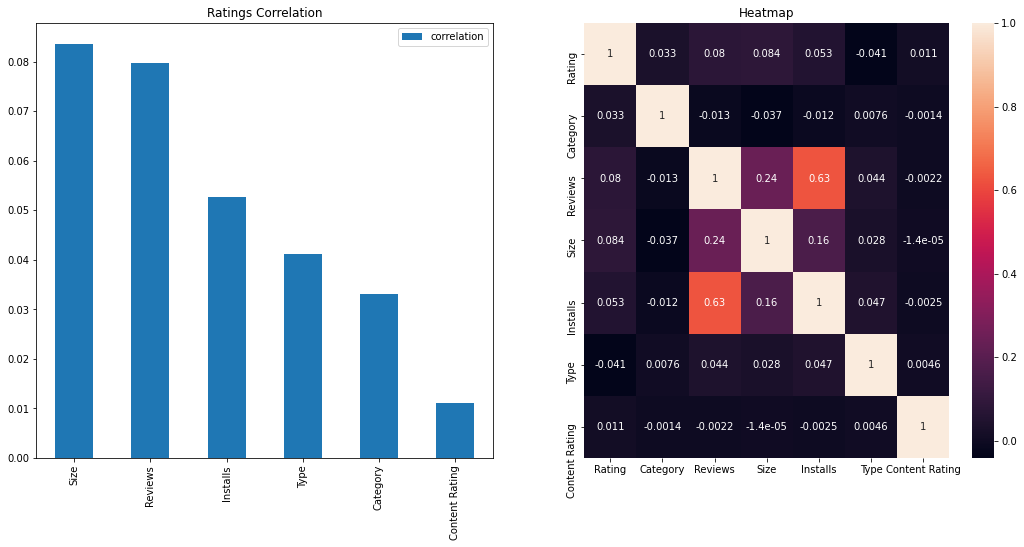

In [41]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(1,2,figsize=(18,8))

correlation = pd.DataFrame({'correlation' : app_df_new.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
ax[0] = correlation.plot(kind="bar", ax=ax[0])
ax[0].set_title('Ratings Correlation')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.heatmap(data=app_df_new.corr(),annot=True);
ax[1].set_title("Heatmap")
plt.show()


In [42]:
app_df_new.corr()

,Rating,Category,Reviews,Size,Installs,Type,Content Rating
Rating,1.000000,0.033079,0.079819,0.083640,0.052693,-0.041180,0.011114
Category,0.033079,1.000000,-0.012889,-0.037212,-0.011643,0.007605,-0.001400
Reviews,0.079819,-0.012889,1.000000,0.240382,0.626187,0.043887,-0.002227
Size,0.083640,-0.037212,0.240382,1.000000,0.162707,0.028124,-0.000014
Installs,0.052693,-0.011643,0.626187,0.162707,1.000000,0.047260,-0.002463
Type,-0.041180,0.007605,0.043887,0.028124,0.047260,1.000000,0.004573
Content Rating,0.011114,-0.001400,-0.002227,-0.000014,-0.002463,0.004573,1.000000


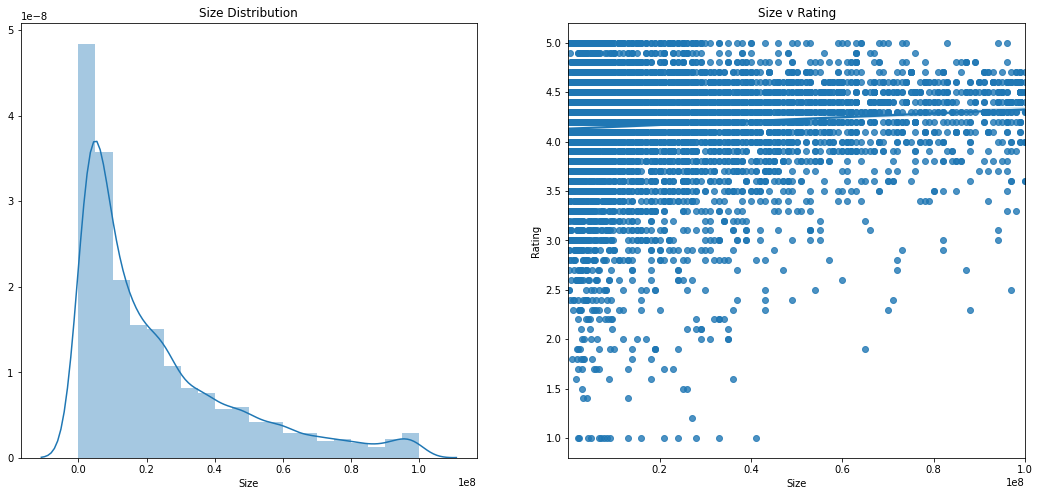

In [43]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = sns.distplot(app_df_new["Size"], bins=20, ax=ax[0]) 
ax[0].set_title('Size Distribution')
ax[0].set_xlabel('Size')
#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.regplot(data=app_df_new,x='Size',y='Rating')
ax[1].set_title("Size v Rating")
plt.show()

<h4>Scatter Size, Rating

<AxesSubplot:xlabel='Size', ylabel='Rating'>

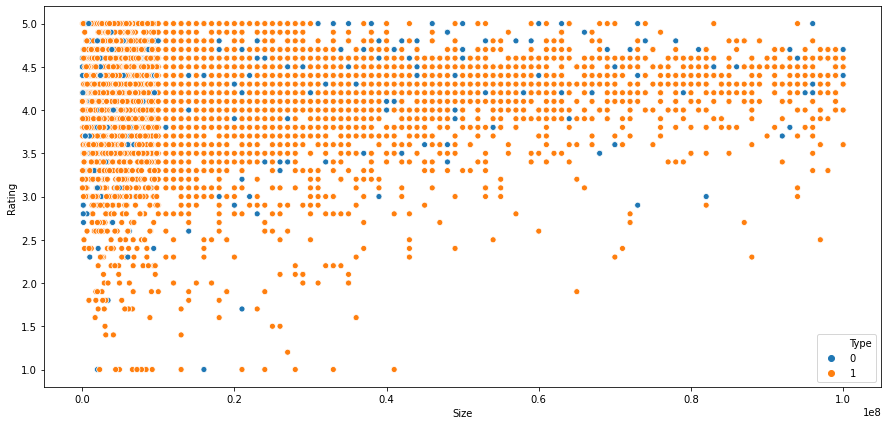

In [44]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_new,x='Size',y='Rating',hue='Type')

<h4>Scatter Reviews, Rating 

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

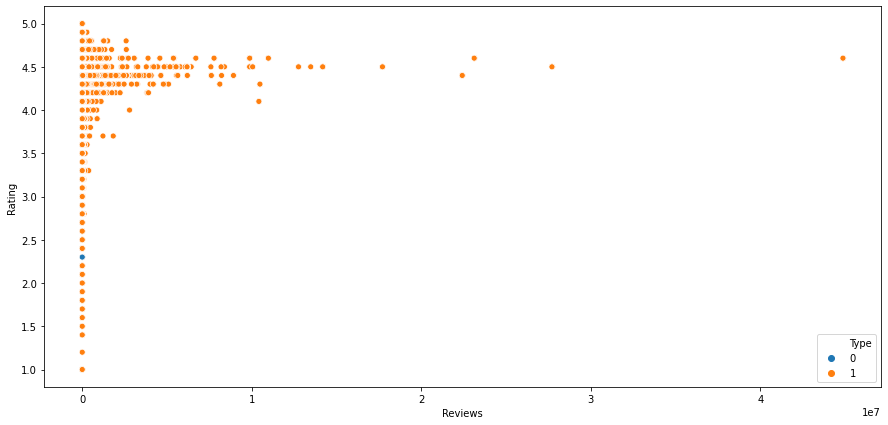

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_new,x='Reviews',y='Rating',hue='Type')

<h4>Scatter Installs, Rating

<AxesSubplot:xlabel='Installs', ylabel='Rating'>

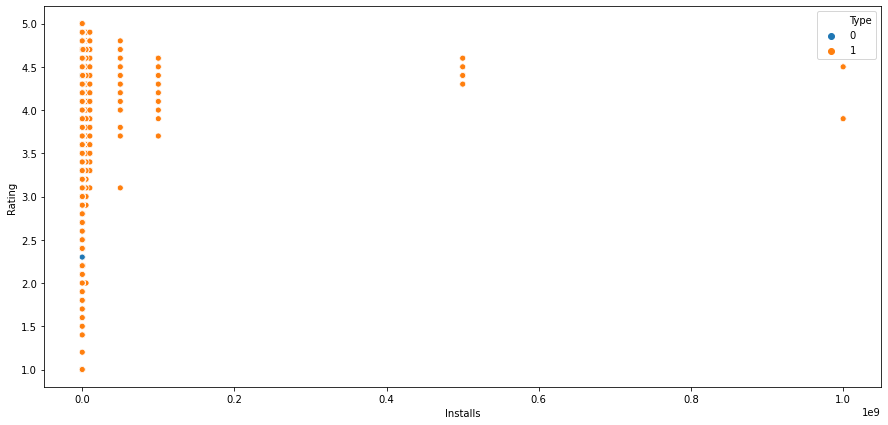

In [46]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=app_df_new,x='Installs',y='Rating',hue='Type')

<h4>Random Forest Regressor to determine Feature, Permutation Importance of Labeled DataFrame

In [47]:
X=app_df_new.iloc[:,1:]
y=app_df_new.iloc[:,0]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [49]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
feature_names = X_train.columns.tolist()

In [51]:
rf_base = rf.base_estimator_.fit(X_train, y_train)

In [52]:
from sklearn import tree
import pydotplus
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(rf_base, out_file=None, feature_names=feature_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('RFRbase_tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.117488 to fit



True

<h4>Feature Importance, Permutation Importance</h4>

Text(0.5, 1.0, 'Permutation Importance')

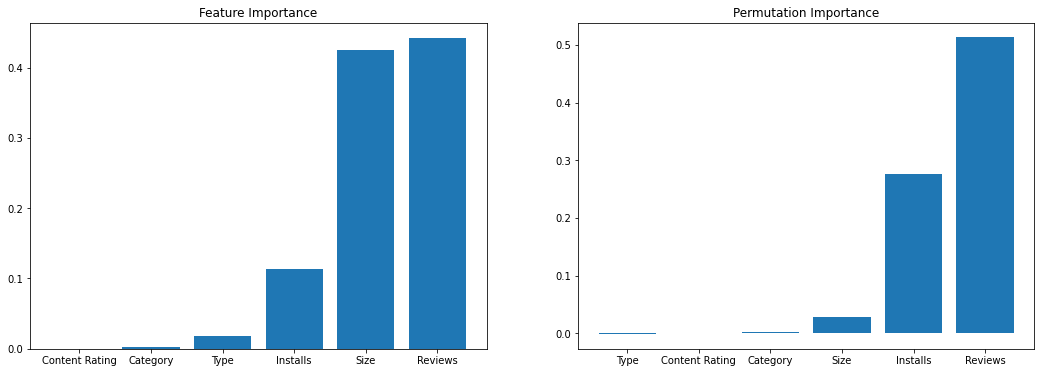

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,6))

feat_sorted_idx = rf.feature_importances_.argsort()
ax[0].bar(X_train.columns[feat_sorted_idx ], rf.feature_importances_[feat_sorted_idx ])
ax[0].set_title("Feature Importance")

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)
perm_sorted_idx = perm_importance.importances_mean.argsort()
ax[1].bar(X_test.columns[perm_sorted_idx], perm_importance.importances_mean[perm_sorted_idx])
ax[1].set_title("Permutation Importance")

Permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. As arguments it requires trained model and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

<h4>Random Forest Regressor to determine Feature, Permutation Importance of One-Hot Encoded DataFrame

In [54]:
X2=features_reset.iloc[:,1:]
y2=features_reset.iloc[:,0]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

<h4>Feature Importance

In [56]:
rf.feature_importances_[feat_sorted_idx]

array([0.0017582 , 0.3212271 , 0.0031189 , 0.00165112, 0.10550025,
       0.26966673])

Text(0.5, 0, 'Feature Importance')

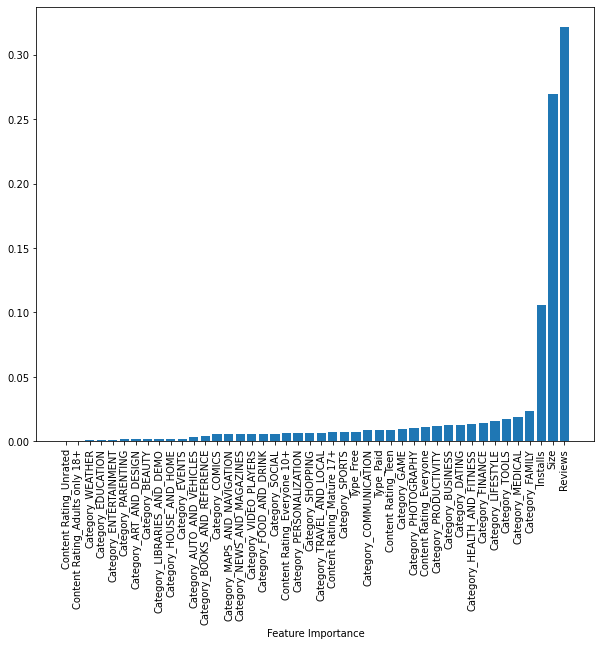

In [57]:
rf.feature_importances_

feat_sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.bar(X_train.columns[feat_sorted_idx], rf.feature_importances_[feat_sorted_idx])
plt.xticks(rotation = 90)
plt.xlabel("Feature Importance")

<h4>Permutation Importance

Text(0.5, 0, 'Permutation Importance')

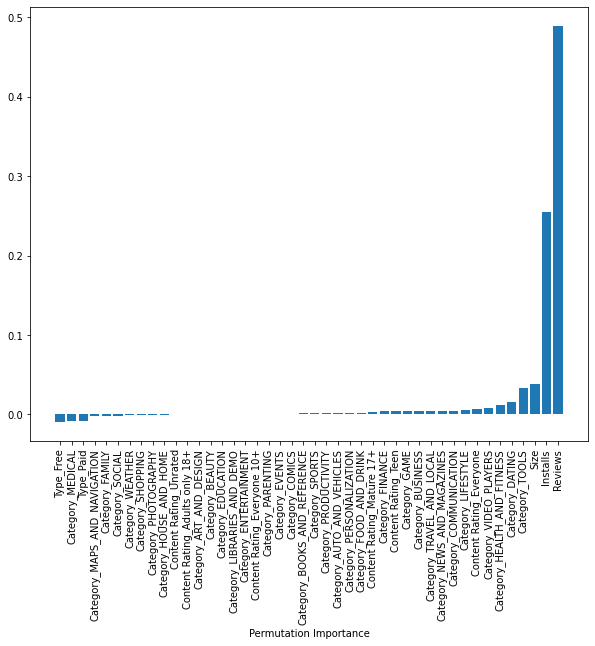

In [58]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)

perm_sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,8))
plt.bar(X_test.columns[perm_sorted_idx], perm_importance.importances_mean[perm_sorted_idx])
plt.xticks(rotation = 90)
plt.xlabel("Permutation Importance")

<h3>Comparing Feature Importance Estimates of RFR, GBR, DTR, ABR base models using One-Hot Encoded DataFrame

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [60]:
feature_names = X2.columns

importances = pd.DataFrame()
# Variable importances with Random Forest, default parameters
est = RandomForestRegressor(n_estimators=1000, n_jobs=-1).fit(X_train, y_train)
importances["RFR"] = pd.Series(est.feature_importances_,
index=feature_names)

# Variable importances with GBRT
gbrt = GradientBoostingRegressor(n_estimators=1000).fit(X_train, y_train)
importances["GBRT"] = pd.Series(gbrt.feature_importances_,
index=feature_names)

# Variable importances with GBRT
dtr = DecisionTreeRegressor().fit(X_train, y_train)
importances["DTR"] = pd.Series(dtr.feature_importances_,
index=feature_names)

# Variable importances with GBRT
abr = AdaBoostRegressor(n_estimators=1000).fit(X_train, y_train)
importances["ABR"] = pd.Series(abr.feature_importances_,index=feature_names)

<AxesSubplot:>

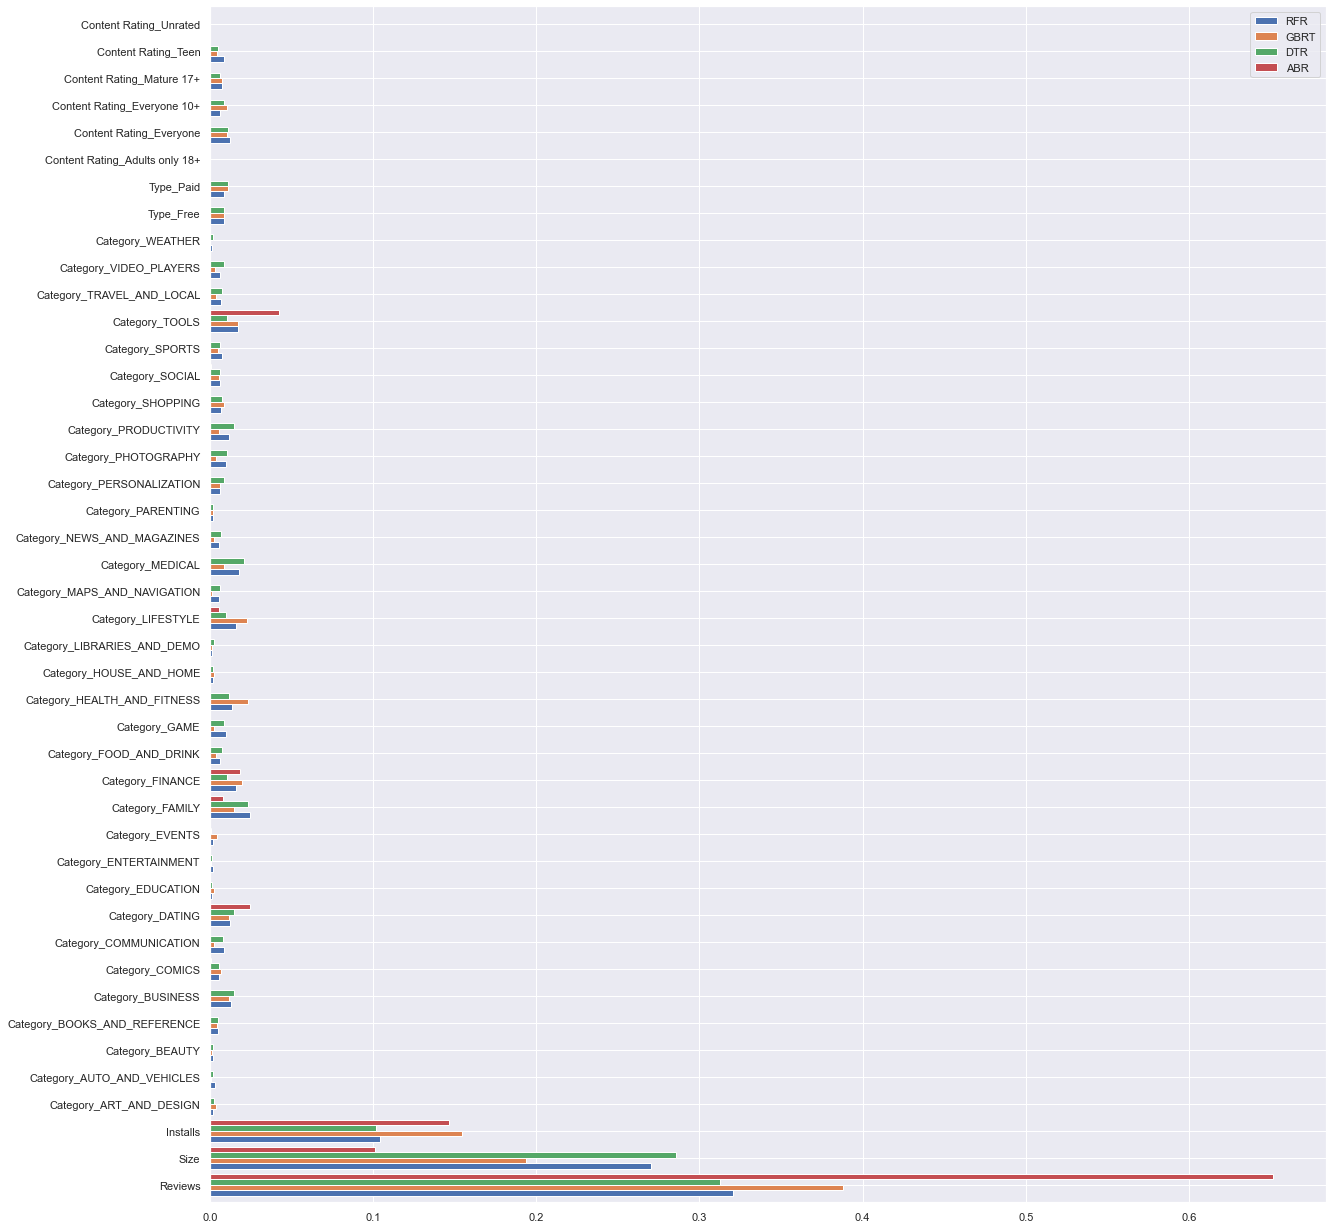

In [61]:
sns.set()
importances.plot(kind="barh",figsize=(20,22), width=.8)

<h3>MAE, MSE, RMSE, Accuracy, and Prediction for base models of One-Hot Encoded DataFrame

In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [63]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred-y_test)
    mape=100*np.mean(errors/y_test)
    accuracy=100-mape
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('MSE: ', mean_squared_error(y_test, y_pred)) 
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
    return accuracy

<h4>MAE, MSE, RMSE, Accuracy, and Prediction for untuned RFR of One-Hot Encoded DataFrame

In [64]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
base_accuracy_rf = evaluate(rf, X_test, y_test)

Average Error: 0.3474 degrees.
Accuracy = 90.01%.
MAE:  0.3473529691006387
MSE:  0.2768489098876517
RMSE:  0.5261643373392496


Plots in order of RFR determined Feature Importance


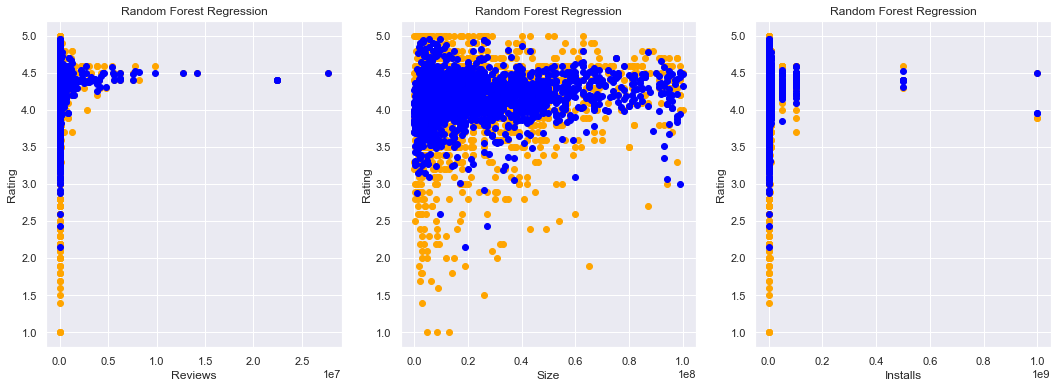

In [65]:
f,ax=plt.subplots(1,3,figsize=(18,6))

ax[0].scatter(X_test['Reviews'].values, y_test, color = 'orange')
ax[0].scatter(X_test['Reviews'].values, y_pred_rf, color = 'blue')
ax[0].set_title('Random Forest Regression')
ax[0].set_xlabel('Reviews')
ax[0].set_ylabel('Rating')

ax[1].scatter(X_test['Size'].values, y_test, color = 'orange')
ax[1].scatter(X_test['Size'].values, y_pred_rf, color = 'blue')
ax[1].set_title('Random Forest Regression')
ax[1].set_xlabel('Size')
ax[1].set_ylabel('Rating')

ax[2].scatter(X_test['Installs'].values, y_test, color = 'orange')
ax[2].scatter(X_test['Installs'].values, y_pred_rf, color = 'blue')
ax[2].set_title('Random Forest Regression')
ax[2].set_xlabel('Installs')
ax[2].set_ylabel('Rating')

print('Plots in order of RFR determined Feature Importance')

Text(0, 0.5, 'Predicted Ratings')

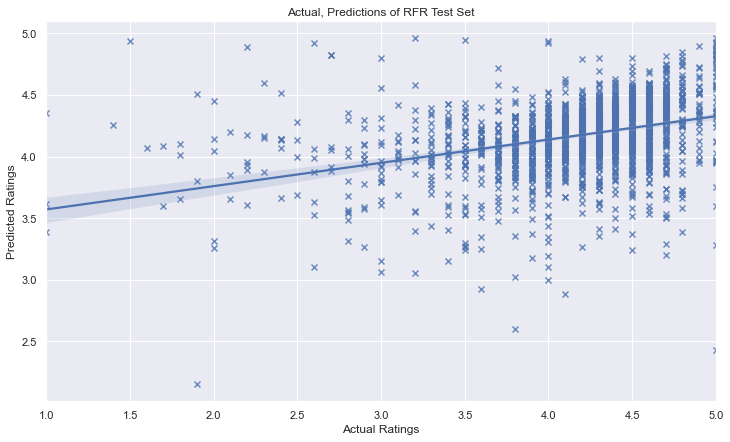

In [66]:
plt.figure(figsize=(12,7))
sns.regplot(y_test,y_pred_rf, marker = 'x')
plt.title('Actual, Predictions of RFR Test Set')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

<h4>MAE, MSE, RMSE, Accuracy, and Prediction for untuned GBRT of One-Hot Encoded DataFrame

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=12)
gbrt = GradientBoostingRegressor(n_estimators=100)
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X_test)
base_accuracy_gbrt = evaluate(gbrt, X_test, y_test)

Average Error: 0.3571 degrees.
Accuracy = 89.73%.
MAE:  0.3571089324881271
MSE:  0.2664844917553577
RMSE:  0.5162213592591435


Plots in order of GBR determined Feature Importance


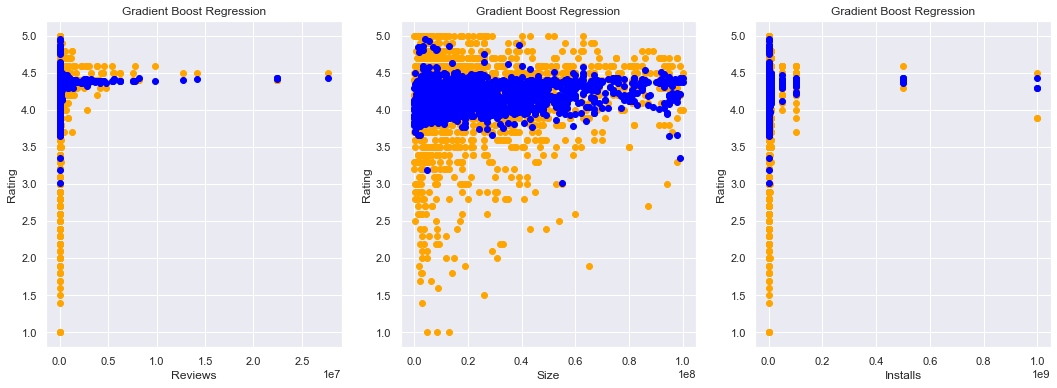

In [68]:
f,ax=plt.subplots(1,3,figsize=(18,6))

ax[0].scatter(X_test['Reviews'].values, y_test, color = 'orange')
ax[0].scatter(X_test['Reviews'].values, y_pred_gbrt, color = 'blue')
ax[0].set_title('Gradient Boost Regression')
ax[0].set_xlabel('Reviews')
ax[0].set_ylabel('Rating')

ax[1].scatter(X_test['Size'].values, y_test, color = 'orange')
ax[1].scatter(X_test['Size'].values, y_pred_gbrt, color = 'blue')
ax[1].set_title('Gradient Boost Regression')
ax[1].set_xlabel('Size')
ax[1].set_ylabel('Rating')

ax[2].scatter(X_test['Installs'].values, y_test, color = 'orange')
ax[2].scatter(X_test['Installs'].values, y_pred_gbrt, color = 'blue')
ax[2].set_title('Gradient Boost Regression')
ax[2].set_xlabel('Installs')
ax[2].set_ylabel('Rating')

print('Plots in order of GBR determined Feature Importance')

Text(0, 0.5, 'Predicted Ratings')

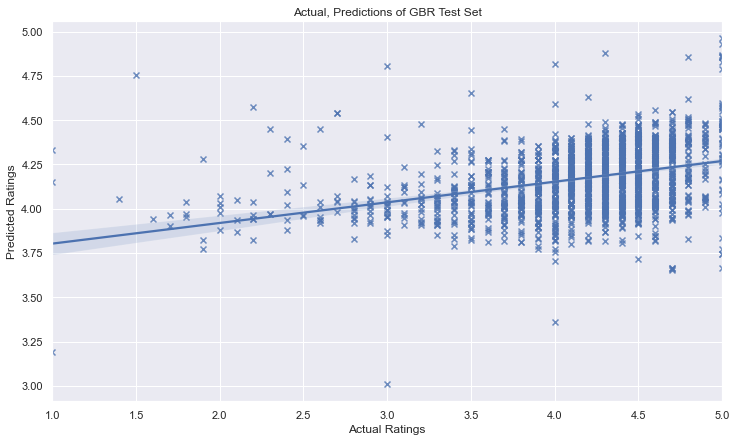

In [69]:
plt.figure(figsize=(12,7))
sns.regplot(y_test,y_pred_gbrt, marker = 'x')
plt.title('Actual, Predictions of GBR Test Set')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

<h4>Actual, Predicted Ratings for base models RFR, GBR

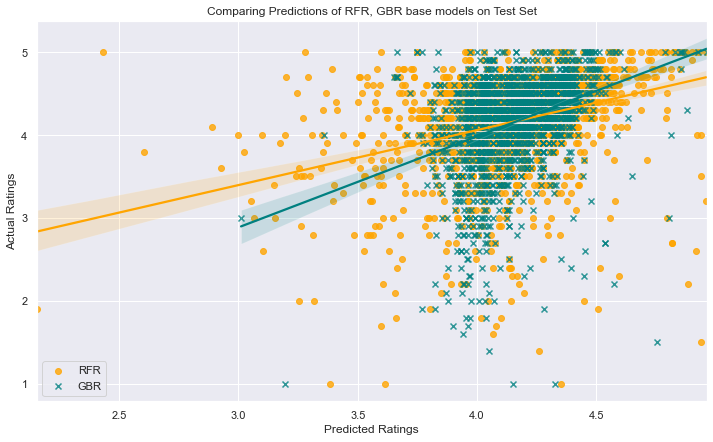

In [70]:
plt.figure(figsize=(12,7))
sns.regplot(y_pred_rf,y_test,color='orange',label = 'RFR')
sns.regplot(y_pred_gbrt,y_test,color='teal', label = 'GBR', marker = 'x')
plt.legend()
plt.title('Comparing Predictions of RFR, GBR base models on Test Set')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

<h4>MAE, MSE, RMSE, Accuracy, and Prediction for untuned DTR of One-Hot Encoded DataFrame

In [71]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
base_accuracy_dtr = evaluate(dtr, X_test, y_test)

Average Error: 0.4452 degrees.
Accuracy = 87.72%.
MAE:  0.4452097358881409
MSE:  0.5015794924909374
RMSE:  0.7082227703843879


Plots in order of DTR determined Feature Importance


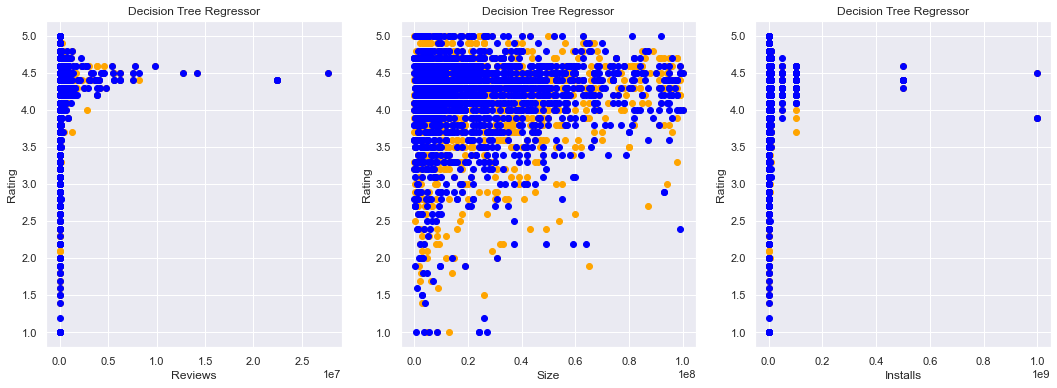

In [72]:
f,ax=plt.subplots(1,3,figsize=(18,6))

ax[0].scatter(X_test['Reviews'].values, y_test, color = 'orange')
ax[0].scatter(X_test['Reviews'].values, y_pred_dtr, color = 'blue')
ax[0].set_title('Decision Tree Regressor')
ax[0].set_xlabel('Reviews')
ax[0].set_ylabel('Rating')

ax[1].scatter(X_test['Size'].values, y_test, color = 'orange')
ax[1].scatter(X_test['Size'].values, y_pred_dtr, color = 'blue')
ax[1].set_title('Decision Tree Regressor')
ax[1].set_xlabel('Size')
ax[1].set_ylabel('Rating')

ax[2].scatter(X_test['Installs'].values, y_test, color = 'orange')
ax[2].scatter(X_test['Installs'].values, y_pred_dtr, color = 'blue')
ax[2].set_title('Decision Tree Regressor')
ax[2].set_xlabel('Installs')
ax[2].set_ylabel('Rating')

print('Plots in order of DTR determined Feature Importance')

Text(0, 0.5, 'Predicted Ratings')

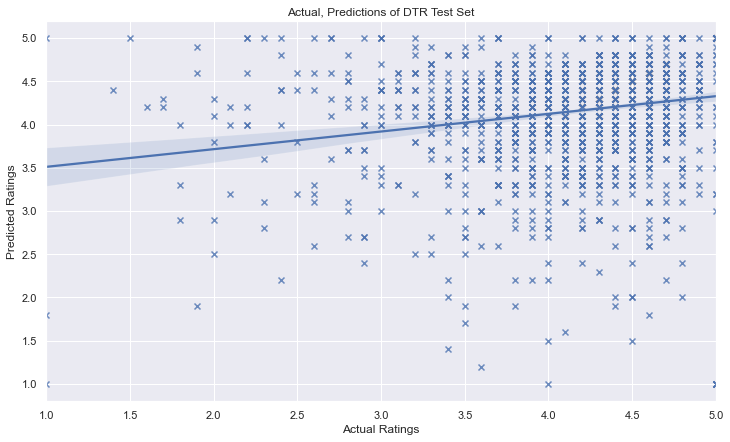

In [73]:
plt.figure(figsize=(12,7))
sns.regplot(y_test,y_pred_dtr, marker = 'x')
plt.title('Actual, Predictions of DTR Test Set')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

<h4>MAE, MSE, RMSE, Accuracy, and Prediction for untuned ABR of One-Hot Encoded DataFrame

In [74]:
abr = AdaBoostRegressor(n_estimators=100)
abr.fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)
base_accuracy_abr = evaluate(abr, X_test, y_test)

Average Error: 0.4327 degrees.
Accuracy = 88.49%.
MAE:  0.43265595834107423
MSE:  0.32991721615382946
RMSE:  0.5743842060448994


Plots in order of ABR determined Feature Importance


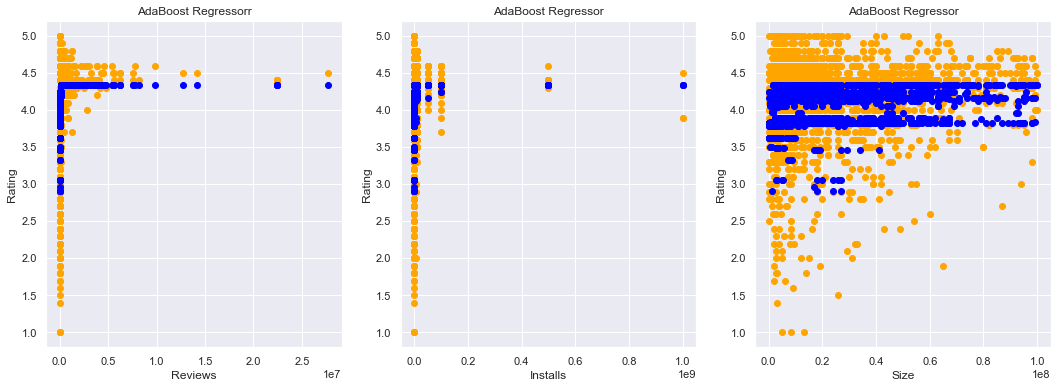

In [75]:
f,ax=plt.subplots(1,3,figsize=(18,6))

ax[0].scatter(X_test['Reviews'].values, y_test, color = 'orange')
ax[0].scatter(X_test['Reviews'].values, y_pred_abr, color = 'blue')
ax[0].set_title('AdaBoost Regressorr')
ax[0].set_xlabel('Reviews')
ax[0].set_ylabel('Rating')

ax[1].scatter(X_test['Installs'].values, y_test, color = 'orange')
ax[1].scatter(X_test['Installs'].values, y_pred_abr, color = 'blue')
ax[1].set_title('AdaBoost Regressor')
ax[1].set_xlabel('Installs')
ax[1].set_ylabel('Rating')

ax[2].scatter(X_test['Size'].values, y_test, color = 'orange')
ax[2].scatter(X_test['Size'].values, y_pred_abr, color = 'blue')
ax[2].set_title('AdaBoost Regressor')
ax[2].set_xlabel('Size')
ax[2].set_ylabel('Rating')

print('Plots in order of ABR determined Feature Importance')

Text(0, 0.5, 'Predicted Ratings')

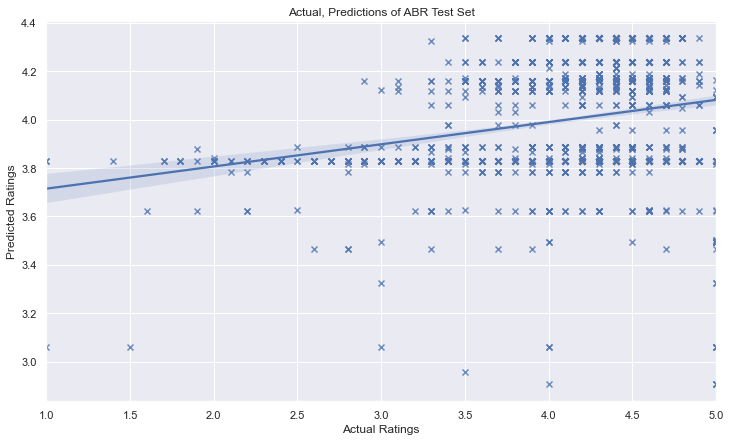

In [76]:
plt.figure(figsize=(12,7))
sns.regplot(y_test,y_pred_abr, marker = 'x')
plt.title('Actual, Predictions of ABR Test Set')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

<h4>Actual, Predicted Ratings for base models DTR, ABR 

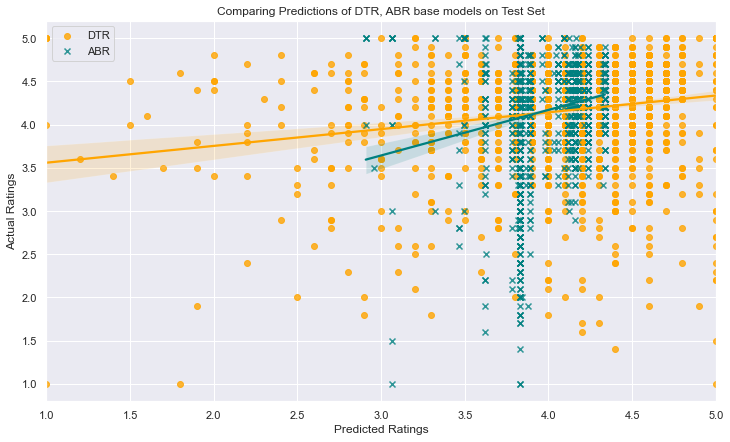

In [77]:
plt.figure(figsize=(12,7))
sns.regplot(y_pred_dtr,y_test,color='orange',label = 'DTR')
sns.regplot(y_pred_abr,y_test,color='teal', label = 'ABR', marker = 'x')
plt.legend()
plt.title('Comparing Predictions of DTR, ABR base models on Test Set')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

<h3>Multiclassification Models - Parameter Tuning 

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

<h4>Random Forest Regressor Hyperparameter Tuning using GridSearchCV on One-Hot Encoded DataFrame<br>
fitting TTS

In [79]:
rf = RandomForestRegressor()
param_grid = {'bootstrap': [True], 
              'max_depth': [80,90,100] ,
              'max_features': [6,7,8], 
              'min_samples_leaf': [3,4], 
              'min_samples_split': [6,8], 
              'n_estimators': [100,200,500]}
GSCV = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs = -1, verbose=2)
GSCV.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [6, 7, 8], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [6, 8],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [80]:
RFRbest_params = GSCV.best_params_ 
RFRbest_grid = GSCV.best_estimator_
print(RFRbest_params)
print(RFRbest_grid)

{'bootstrap': True, 'max_depth': 100, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 200}
RandomForestRegressor(max_depth=100, max_features=8, min_samples_leaf=3,
                      min_samples_split=6, n_estimators=200)


In [81]:
RFgrid_accuracy = evaluate(RFRbest_grid, X_test, y_test)
print('Improvement of {:0.2f}% compared to RFR base model.'.format( 100 * (RFgrid_accuracy - base_accuracy_rf) / base_accuracy_rf))

Average Error: 0.3472 degrees.
Accuracy = 89.99%.
MAE:  0.3471731000976763
MSE:  0.2579301781133607
RMSE:  0.5078682684647277
Improvement of -0.03% compared to RFR base model.


Text(0, 0.5, 'Predicted Ratings')

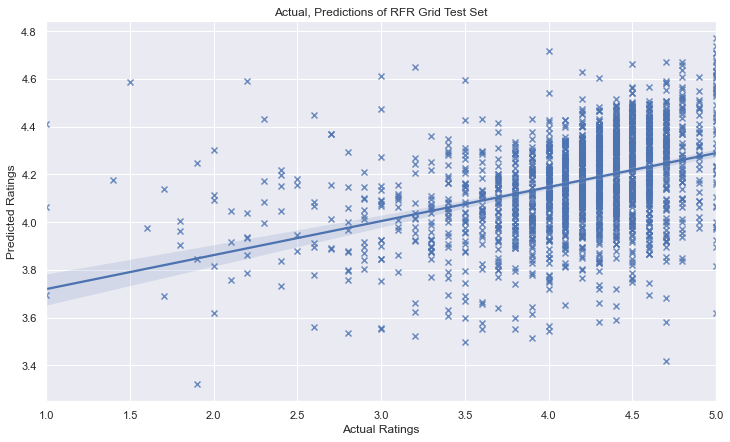

In [82]:
RFRbest_grid.fit(X_train, y_train)

y_pred_RFRgrid = RFRbest_grid.predict(X_test)
plt.figure(figsize=(12,7))
sns.regplot(y_test,y_pred_RFRgrid, marker = 'x')
plt.title('Actual, Predictions of RFR Grid Test Set')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

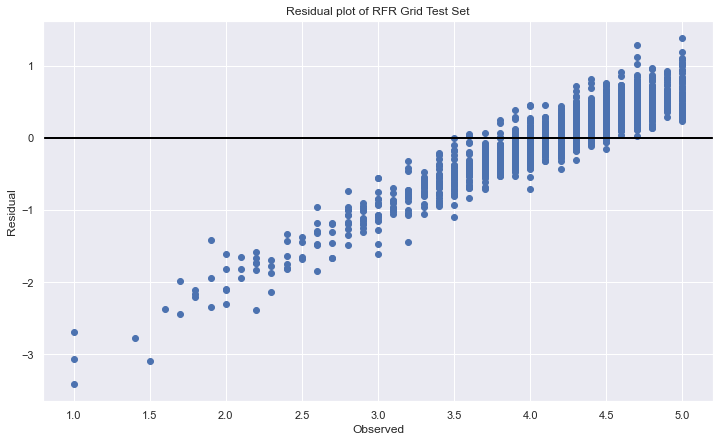

In [83]:
#Residual scatter plot
residuals = y_test-y_pred_RFRgrid
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot of RFR Grid Test Set')
plt.show()

Selected Tree Plot using best parameters

In [84]:
RFRbest_est = GSCV.best_estimator_.estimators_[0]

In [85]:
feature_names = X_train.columns

# export the learned model to tree
dot_data = tree.export_graphviz(RFRbest_est, out_file=None, feature_names=feature_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('RFRgrid_tree.png')

True

Comparing GridSearchCV to RandomizedSearchCV 

In [86]:
rf = RandomForestRegressor()
param_distributions = {'bootstrap': [True], 
              'max_depth': [80,90,100] ,
              'max_features': [6,7,8], 
              'min_samples_leaf': [3,4], 
              'min_samples_split': [6,8], 
              'n_estimators': [100,200,500]}
RSCV = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, cv=5, n_jobs = -1, verbose=2)
RSCV.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100],
                                        'max_features': [6, 7, 8],
                                        'min_samples_leaf': [3, 4],
                                        'min_samples_split': [6, 8],
                                        'n_estimators': [100, 200, 500]},
                   verbose=2)

In [87]:
RFRbest_paramsRS = RSCV.best_params_ 
RFRbest_gridRS = RSCV.best_estimator_
print(RFRbest_paramsRS)
print(RFRbest_gridRS)

{'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 8, 'max_depth': 80, 'bootstrap': True}
RandomForestRegressor(max_depth=80, max_features=8, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)


In [88]:
RFRS_accuracy = evaluate(RFRbest_gridRS, X_test, y_test)
print('Improvement of {:0.2f}% compared to RFR base model.'.format( 100 * (RFRS_accuracy - base_accuracy_rf) / base_accuracy_rf))

Average Error: 0.3479 degrees.
Accuracy = 89.95%.
MAE:  0.34791291917554773
MSE:  0.25882424903540746
RMSE:  0.508747726319644
Improvement of -0.06% compared to RFR base model.


Results of RFR RandomSearchCV of very similiar results to RFR GridSearchCV.

By providing appropriate values to n_jobs, we can do parallel computations. We can distribute the evaluation of the different folds across multiple CPUs on our computer. If we set the n_jobs to 1, only one CPU will be used to evaluate the performances. However, by setting n_jobs=2, we could distribute the process of cross-validation to two CPUs. Finally, by setting n_jobs=-1, we can use all available CPUs on our computer to do the computation in parallel. This is a very effective way, especially when we have a large dataset and when we set cv to a large number, for example, 10.

min_samples_split = 500 : This should be ~0.5-1% of total values <br>
max_depth = based on the number of observations and predictors <br>
max_features = Recommended default values are 𝑚=𝑝/3 for regression problems and 𝑚=𝑝√ for classification problems

<h4>Gradient Boost Regressor Hyperparameter Tuning using GridSearchCV on One-Hot Encoded DataFrame<br>
fitting TTS

In [89]:
# Variable importances with GBRT
gbrt = GradientBoostingRegressor()
# Careful tuning is required to obtained good results
param_grid = {
"learning_rate": [0.1,0.01,.001],
"subsample": [0.5, 0.7, 1.0],
"max_depth": [3,5,7],
"min_samples_leaf": [1,3,5],
"n_estimators": [100, 200, 500]}

GSCV_gb = GridSearchCV(estimator=gbrt, param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)
GSCV_gb.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=2)

In [90]:
GBRbest_grid = GSCV_gb.best_estimator_
GBRbest_param = GSCV_gb.best_params_
print(GBRbest_grid)
print(GBRbest_param)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, min_samples_leaf=5,
                          n_estimators=500, subsample=0.5)
{'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 500, 'subsample': 0.5}


In [91]:
GBgrid_accuracy = evaluate(GBRbest_grid, X_test, y_test)
print('Improvement of {:0.2f}% compared to GBR base model.'.format( 100 * (GBgrid_accuracy - base_accuracy_gbrt) / base_accuracy_gbrt))

Average Error: 0.3480 degrees.
Accuracy = 89.95%.
MAE:  0.34803681220462585
MSE:  0.2644044918898795
RMSE:  0.5142027731254272
Improvement of 0.25% compared to GBR base model.


Text(0, 0.5, 'Predicted Ratings')

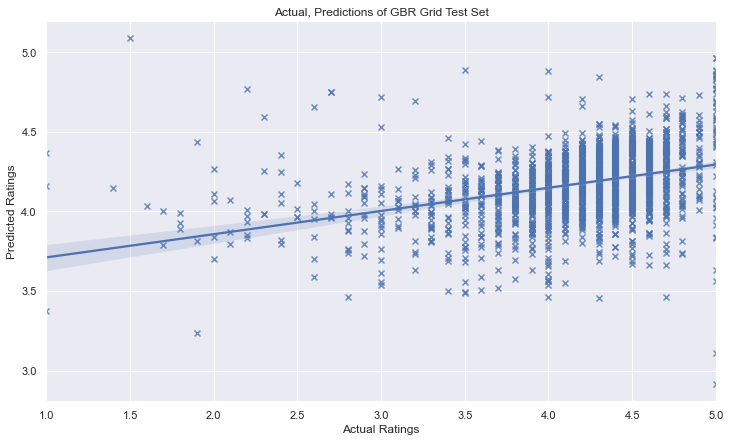

In [92]:
GBRbest_grid.fit(X_train, y_train)

y_pred_GBRgrid = GBRbest_grid.predict(X_test)
plt.figure(figsize=(12,7))
sns.regplot(y_test,y_pred_GBRgrid, marker = 'x')
plt.title('Actual, Predictions of GBR Grid Test Set')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

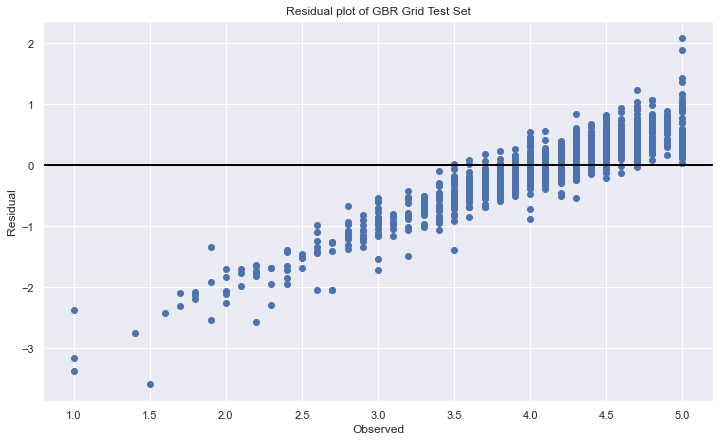

In [93]:
#Residual scatter plot
residuals = y_test-y_pred_GBRgrid
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot of GBR Grid Test Set')
plt.show()

<h4>Boosting base Estimator Decision Tree Regressor with AdaBoost Regressor

In [94]:
#GBRDT
base_estimator = DecisionTreeRegressor(max_depth=1, splitter='best', min_samples_split=2)
abr_dtr = AdaBoostRegressor(base_estimator=base_estimator,n_estimators=100)
abr_dtr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  n_estimators=100)

In [95]:
y_pred_abr_dtr = abr_dtr.predict(X_test)
base_accuracy_abr_dtr = evaluate(abr_dtr, X_test, y_test)
print('Improvement of {:0.2f}% compared to DTR base model.'.format( 100 * (base_accuracy_abr_dtr - base_accuracy_dtr) / base_accuracy_dtr))
print('Improvement of {:0.2f}% compared to ABR base model.'.format( 100 * (base_accuracy_abr_dtr - base_accuracy_abr) / base_accuracy_abr))


Average Error: 0.4196 degrees.
Accuracy = 88.62%.
MAE:  0.4195658796080269
MSE:  0.3119808358325682
RMSE:  0.5585524468056408
Improvement of 1.03% compared to DTR base model.
Improvement of 0.15% compared to ABR base model.


Text(0, 0.5, 'Predicted Ratings')

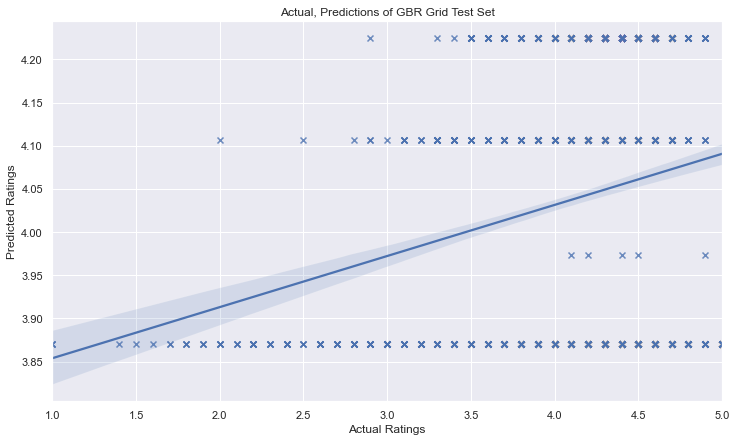

In [96]:
plt.figure(figsize=(12,7))
sns.regplot(y_test,y_pred_abr_dtr, marker = 'x')
plt.title('Actual, Predictions of GBR Grid Test Set')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

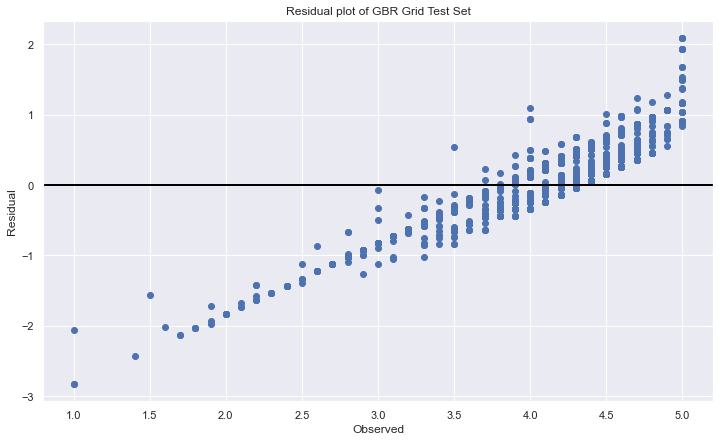

In [97]:
residuals = y_test-y_pred_abr
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot of GBR Grid Test Set')
plt.show()

Stacking Regressor<br>
https://scikit-learn.org/stable/modules/ensemble.html#adaboost <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html#sklearn.ensemble.StackingRegressor <br>
https://github.com/andreashsieh/stacked_generalization    

<h4>Stacked Regression Ensemble using RFR, GBR

In [98]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor

final_layer_rfr = RandomForestRegressor(n_estimators=100, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer_gbr = GradientBoostingRegressor(n_estimators=100, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer = StackingRegressor(estimators=[('rf', final_layer_rfr),('gbrt', final_layer_gbr)],final_estimator=RidgeCV())
multi_layer_regressor = StackingRegressor(estimators=[('ridge', RidgeCV()),('lasso', LassoCV(random_state=42)),
                                                      ('knr', KNeighborsRegressor(n_neighbors=20, metric='euclidean'))],
                                                      final_estimator=final_layer)
multi_layer_regressor.fit(X_train, y_train)

print('R2 score: {:.2f}'.format(multi_layer_regressor.score(X_test, y_test)))


R2 score: 0.02


In [99]:
y_pred_mlreg = multi_layer_regressor.predict(X_test)
stacked_accuracy = evaluate(multi_layer_regressor, X_test, y_test)

print('Improvement of {:0.2f}% compared to RFR base model.'.format( 100 * (stacked_accuracy- base_accuracy_rf) / base_accuracy_rf))
print('Improvement of {:0.2f}% compared to GBR base model.'.format( 100 * (stacked_accuracy- base_accuracy_gbrt) / base_accuracy_gbrt))

print('Improvement of {:0.2f}% compared to RFR Grid model.'.format( 100 * (stacked_accuracy- RFgrid_accuracy) / RFgrid_accuracy))
print('Improvement of {:0.2f}% compared to GBR Grid model.'.format( 100 * (stacked_accuracy- GBgrid_accuracy) / GBgrid_accuracy))


Average Error: 0.3870 degrees.
Accuracy = 88.92%.
MAE:  0.38699425411981286
MSE:  0.2992294655305983
RMSE:  0.5470187067464862
Improvement of -1.21% compared to RFR base model.
Improvement of -0.90% compared to GBR base model.
Improvement of -1.18% compared to RFR Grid model.
Improvement of -1.15% compared to GBR Grid model.


Text(0, 0.5, 'Predicted Ratings')

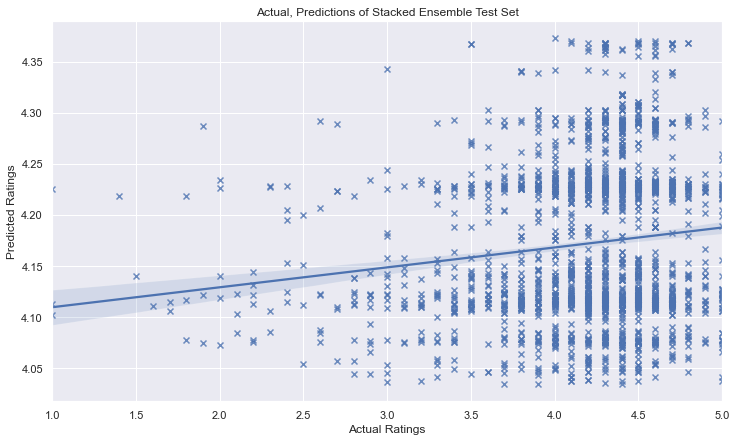

In [100]:
plt.figure(figsize=(12,7))
sns.regplot(y_test,y_pred_mlreg, marker = 'x')
plt.title('Actual, Predictions of Stacked Ensemble Test Set')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

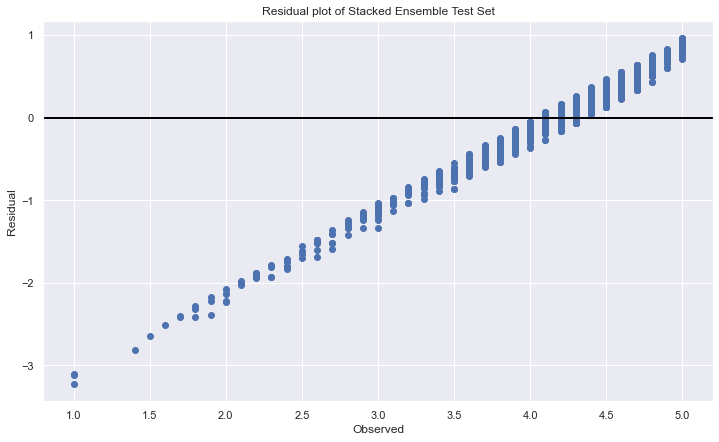

In [101]:
#Residual scatter plot
residuals = y_test-y_pred_mlreg
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot of Stacked Ensemble Test Set')
plt.show()

Blending vs Stacking <br> 
Blending retains a hold-out for testing rather than using whole set<br>
https://medium.com/@stevenyu530_73989/stacking-and-blending-intuitive-explanation-of-advanced-ensemble-methods-46b295da413c<br>
<h4>Stacking using Kfold:</h4>

In [102]:
from sklearn.model_selection import StratifiedKFold

Implementation of Normalized Scaling of Reviews, Size, Installs necessary to evaluate Stacking Model using K-fold

#for scaling continuous variables apart from one hot enc
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('X_train', StandardScaler(), ['LIMIT','BILL_SEP','BILL_AUG','PAYMENT_SEP','PAYMENT_AUG'])], remainder ='passthrough')

X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

Prediction Intervals <br>
Plot Confusion Matrix for Predicted Values within Range of .05 degrees of actual value as True <br>
AS heatmap https://datascience.stackexchange.com/questions/33286/how-to-print-a-confusion-matrix-from-random-forests-in-python

Describe Residual Evaluation<br> 
Implement tqdm on model param training to elevate fold training<br>
Ax plots for 4-model comparison based on determined feature importance priorities (Installs, Size, Reviews)<br>
Create Table to compare model performance<br>

Note: Using GridSearchCV for hyperparameter tuning costs more computationally, evaluating parameters separately can be of advantage to determine if feature is relevant rather than evaluating fits uneccesarily in GridSearchCV <br>(source:https://towardsdatascience.com/demystifying-model-training-tuning-f4e6b46e7307)<br>
Example for hypertuning parameters separately: https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

<b>Normalization

In [103]:
from sklearn.preprocessing import MinMaxScaler #normalization 0:1
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)
dataset = pd.DataFrame(data_transformed)
print(dataset.describe())

                0            1            2            3            4  \
count  7723.00000  7723.000000  7723.000000  7723.000000  7723.000000   
mean      0.00751     0.006569     0.229639     0.008424     0.925288   
std       0.08634     0.041519     0.234516     0.050157     0.262943   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%       0.00000     0.000002     0.052919     0.000010     1.000000   
50%       0.00000     0.000052     0.139927     0.000100     1.000000   
75%       0.00000     0.000870     0.329943     0.001000     1.000000   
max       1.00000     1.000000     1.000000     1.000000     1.000000   

                 5  
count  7723.000000  
mean      0.000259  
std       0.016091  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


Normalization used to scale features 'Reviews', 'Size', 'Installs' on a 0 to 1 scale. Best used when feature values do not follow a gaussian distribution. Applied only to continuous variables. <br>
In this case it is not applied to target variable 'Rating'.<br><b>
MinMaxScaler class of sk.learn.preprocessing is used for Normalization.

<b>Standardized Scaling

In [104]:
from sklearn.preprocessing import StandardScaler #Standardization - mean:0, STD:1 to normalize distribution 
trans = StandardScaler()
data_standard = trans.fit_transform(X)
dataset_standard = pd.DataFrame(data_standard)
print(dataset_standard.describe())
dataset_standard.head()

                  0             1             2             3             4  \
count  7.723000e+03  7.723000e+03  7.723000e+03  7.723000e+03  7.723000e+03   
mean  -1.196780e-14 -1.072433e-16 -6.464357e-16  3.987372e-15  1.497284e-15   
std    1.000065e+00  1.000065e+00  1.000065e+00  1.000065e+00  1.000065e+00   
min   -8.698771e-02 -1.582226e-01 -9.792668e-01 -1.679635e-01 -3.519197e+00   
25%   -8.698771e-02 -1.581655e-01 -7.535983e-01 -1.677641e-01  2.841557e-01   
50%   -8.698771e-02 -1.569719e-01 -3.825663e-01 -1.659697e-01  2.841557e-01   
75%   -8.698771e-02 -1.372699e-01  4.277336e-01 -1.480250e-01  2.841557e-01   
max    1.149588e+01  2.392890e+01  3.285107e+00  1.977056e+01  2.841557e-01   

                  5  
count  7.723000e+03  
mean   1.042112e-15  
std    1.000065e+00  
min   -1.609453e-02  
25%   -1.609453e-02  
50%   -1.609453e-02  
75%   -1.609453e-02  
max    6.213292e+01  


,0,1,2,3,4,5
0,11.495876,-0.158138,-0.169329,-0.167764,0.284156,-0.016095
1,11.495876,-0.157704,-0.382566,-0.157994,0.284156,-0.016095
2,11.495876,-0.111271,-0.608597,-0.068271,0.284156,-0.016095
3,11.495876,-0.042523,0.086555,0.828963,0.284156,-0.016095
4,11.495876,-0.157704,-0.860217,-0.165970,0.284156,-0.016095


Standardization used to scale features 'Reviews, 'Size', 'Installs' by centering the features at a mean of 0 with a (unit) standard deviation of 1 so that the feature columns have the same parameters as standard normal distribution. Unlike normalized distribution it maintains useful outlier information while remaining less sensitive to them. It does not have a bounding range. <br><b>
StandardScaler class of sk.learn.preprocessing is used for Standardization.